In [1]:
import pandas as pd
import flags
import numpy as np
from matplotlib import pyplot
import os
from astropy.io import fits
import astropy.io.fits as fits
import astropy
from astropy.table import Table, join, hstack, vstack
from cycler import cycler
import healpy as hp
import pandas as pd
from random import choice

In [2]:
#tab = gama
def convertepixel():
    path_dir = "/home/priscila/devel/mestrado/ps1/64"
    #path_dir = os.path.join(path_dir,dir)
    #path_dir = os.path.join(path_dir,'32768')
    for i,filename in enumerate(os.listdir(path_dir)):
        if i==0:
            pathfile = os.path.join(path_dir,filename)
            tab = Table.read(pathfile)
        else:
            pathfile = os.path.join(path_dir,filename)
            subtab = Table.read(pathfile)
            tab = vstack([tab, subtab])
    tab = tab.to_pandas()

    tab = tab.iloc[tab[iPSFMag !=  -999]]
    return tab
#pixel = convertepixel()
#pixel['graErr']*3600
#pyplot.hist(pixel['graErr']*3600,bins = 30)
#pyplot.hist(pixel['gdecErr']*3600,bins = 30)


In [3]:
#ps1 = Table.read("/home/priscila/arquivosfits/64/PixelFit_64_24292.fits")
match = Table.read("/home/priscila/devel/mestrado/resultados_pixel/mean/match_match_PixelFit_64_25859.fits").to_pandas()
match = match.loc[match['iKronMag'] != -999]

params_flags = {"use":True, "table":1, "band":'i'}
constraints = {"use":True, "type":"galaxy", "band": "i"}
constraints_star = {"use":True, "type":"star", "band": "i"}

def query_constraints(table,constraints):
    band_KronMag = table[''.join([constraints["band"],'KronMag'])]
    band_PSFMag  = table[''.join([constraints["band"],'PSFMag'])]

    if constraints['use']:
        if constraints["type"]=="galaxy":
            constraint = (band_KronMag - band_PSFMag) + 0.192 - 0.120*(band_KronMag - 21.) - 0.018*(band_KronMag - 21.)*(band_KronMag - 21.)
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999)*(constraint>0))  
        
        elif constraints["type"]=="star":
            constraint = (band_KronMag - band_PSFMag) + 0.192 - 0.120*(band_KronMag - 21.) - 0.018*(band_KronMag - 21.)*(band_KronMag - 21.)
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999)*(constraint<0))
        
        else:    
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999))
    else:
        list1 = np.where((table['gdec']>-999)*(table['gra']>-999))
    
    return table[list1]
#ps1gal = query_constraints(ps1, constraints)
#ps1star = query_constraints(ps1, constraints_star)


## Para selecionar valores de uma coluna em um determinado range, podemos usar o método query do pandas:

In [4]:
match.columns

Index(['SPECID', 'SURVEY', 'SURVEY_CODE', 'RA_1', 'DEC_1', 'WMIN', 'WMAX', 'Z',
       'NQ', 'PROB',
       ...
       'yPSFMagErr', 'yApMag', 'yApMagErr', 'yKronMag', 'yKronMagErr',
       'raMean', 'decMean', 'raStack', 'decStack', 'random'],
      dtype='object', length=146)

In [5]:
minor = match[match['PETROMAG_I'] < 19.0]

In [6]:
major = match[match['PETROMAG_I'] > 19.0]

In [7]:
#fig = pyplot.figure()
#grid = pyplot.GridSpec(1,1,top=2,right=2)
#ax = pyplot.subplot(grid[0,0])
#pyplot.scatter(pixel['iPSFMag'],pixel['iPSFMag'] - pixel['iKronMag'],s = 200, label ='PAN STARRS pixel')
#pyplot.scatter(major['iPSFMag'],major['iPSFMag'] - major['iKronMag'] ,s= 190,color='pink', label=' Mag > 19')
#pyplot.scatter(minor['iPSFMag'],minor['iPSFMag'] - minor['iKronMag'] ,s= 15,color='purple', label=' Mag < 19')
#pyplot.scatter(ps1gal['iPSFMag'],ps1gal['iPSFMag'] - ps1gal['iKronMag'] ,s= 5,color='red', label='Stars')
#pyplot.scatter(ps1star['iPSFMag'],ps1star['iPSFMag'] - ps1star['iKronMag'] ,s= 5,color='cyan', label='Galaxies')
#pyplot.scatter(tab_new['iPSFMag'],tab_new['iPSFMag'] - tab_new['iKronMag'] ,s= 150,color='yellow', label=' ')
#ax.axhline(y=0, color='black',ls='--')
#ax.axvline(x=21, color='black',ls='--')
#pyplot.legend(loc='best')
#pyplot.xlim(15,21)
#pyplot.ylim(-1,3)

In [8]:
match['random']

0      0.181632
1      0.978981
2      0.702411
3      0.091898
4      0.076862
         ...   
173    0.622248
174    0.122685
175    0.387801
176    0.819989
177    0.830655
Name: random, Length: 177, dtype: float64

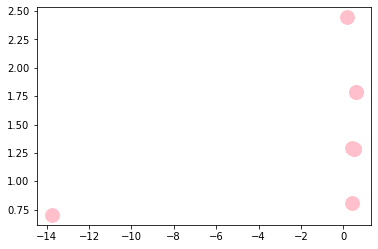

In [9]:
pyplot.scatter(major['PETROMAG_R'] - major['MODELMAG_I'],major['rPSFMag'] - major['iKronMag'] ,s= 190,color='pink', label=' Mag > 19')


In [12]:
import os
from astropy.table import Table, vstack
path_dir = '/home/priscila/devel/mestrado/des/64'
final_dest = '/home/priscila/devel/mestrado/des_z.fits'
tables = []
for i,filename in enumerate(os.listdir(path_dir)):
    tables.append(Table.read(os.path.join(path_dir,filename)))
    #print(os.path.join(path_dir,filename))
table = vstack(tables)
table.write(final_dest, overwrite = True)


In [18]:
path_dir = '/home/priscila/devel/mestrado/resultados_pixel/mean'
final_dest = '/home/priscila/devel/mestrado/results_mean.fits'
tables = []
for i,filename in enumerate(os.listdir(path_dir)):
    tables.append(Table.read(os.path.join(path_dir,filename)))
table = vstack(tables)
table.write(final_dest, overwrite = True)
match = Table.read(final_dest).to_pandas()


### Regiões do gama

In [19]:
reg_ra = ((30.2,38.8),(129.0,141.0),(174.0,186.0),(211.5,223.5),(339.0, 351.0))

In [34]:
reg_dec = ((-10.25,-3.72),(-2,3),(-3,2),(-2,3),(-35,-30))
#for col in match.columns:
#    print(col)
match = match[match['iPSFMag'] != -999]
match = match[match['rPSFMag'] != -999]
match = match[match['iKronMag'] != -999]

,SPECID,SURVEY,SURVEY_CODE,RA_1,DEC_1,WMIN,WMAX,Z,NQ,PROB,...,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random


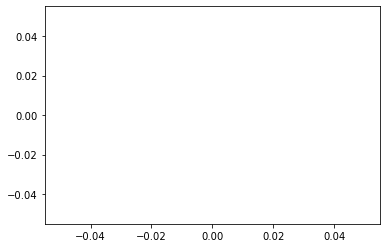

In [52]:
colors = ('b','g','r','c','m','y','k','w')
region = match[match['RA_1'] > 30.2]
region = match[match['RA_1'] < 38.8]
region = match[match['DEC_1']>-10.25]
region = match[match['DEC_1']<-3.72]
pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])
region.head()

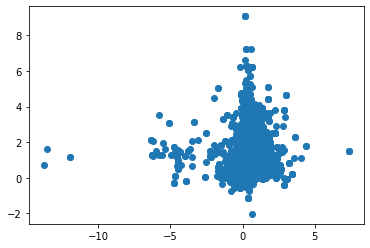

In [47]:
region = match[match['RA_1'] > 129.0]
region = match[match['RA_1'] < 141.0]
region = match[match['DEC_1']>-2]
region = match[match['DEC_1']<3]
pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])

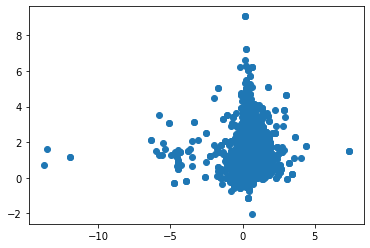

In [50]:
region = match[match['RA_1'] > 174]
region = match[match['RA_1'] < 186]
region = match[match['DEC_1']>-3]
region = match[match['DEC_1']<2]
pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])

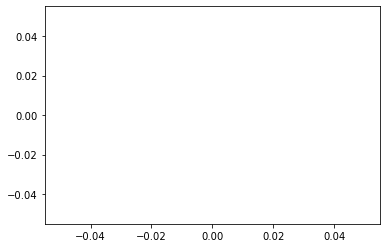

In [48]:
region = match[match['RA_1'] > 339]
region = match[match['RA_1'] < 351]
region = match[match['DEC_1']> -35]
region = match[match['DEC_1']< -30]
pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])

In [51]:
region.head()

,SPECID,SURVEY,SURVEY_CODE,RA_1,DEC_1,WMIN,WMAX,Z,NQ,PROB,...,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random
0,b'2dF291543',b'2dFGRS',2,176.96523,1.20800,3693.459961,8103.65,0.09450,4,0.0,...,0.006721,17.1034,0.000935,16.8133,0.009004,176.965461,1.208094,176.965456,1.208118,0.090408
1,b'2dF291587',b'2dFGRS',2,176.91706,1.33958,3693.459961,8103.65,0.10755,4,0.0,...,0.059455,18.7997,0.002041,18.6640,0.048555,176.917205,1.339747,176.917228,1.339756,0.083251
2,b'2dF291607',b'2dFGRS',2,176.89778,1.06449,3693.459961,8103.65,0.10441,4,0.0,...,0.005612,16.7461,0.000752,16.5887,0.007050,176.897954,1.064674,176.897966,1.064692,0.195966
3,b'2dF291676',b'2dFGRS',2,176.81222,0.97636,3611.969971,8021.41,0.13262,4,0.0,...,0.007219,17.0277,0.000856,16.9601,0.009977,176.812374,0.976474,176.812398,0.976473,0.953159
4,b'2dF291689',b'2dFGRS',2,176.80076,0.96111,3635.189941,8044.87,0.12559,4,0.0,...,0.007909,17.2559,0.000951,17.0795,0.010335,176.800919,0.961275,176.800945,0.961275,0.874025


In [9]:
### Abrindo os dados do des

In [15]:
from astropy.table import Table
temp = Table.read("/home/priscila/devel/mestrado/des_z.fits").to_pandas()
temp['DEC']

0         -52.626246
1         -52.630564
2         -52.662120
3         -52.631423
4         -52.634736
             ...    
1243762   -53.466156
1243763   -53.466798
1243764   -53.468595
1243765   -15.090676
1243766   -15.092527
Name: DEC, Length: 1243767, dtype: float64